DIRECTORS

The next variable that we decided to analyze were directors. Directors play a large part when it comes to a movies success and due to this, we wanted to provide recommendations on what. To make sure that the data wasn't skewed, we decided to filter by directors that had produced 5 or more movies, as we wanted to make sure that we discarded any outliers - or directors that had produced only one movie and had a high profit from that movie only. 

We manipulated the data to find the top 3 directors with the highest average profit produced from the movies they directed across all genres, which is shown below. 

The graph above depicts the top 8 directors with the highest average profit from movies they directed across all genres. From this we can determine that Joss Whedon, Anthony Russo, and Kyle Balda are the top 3 directors who have produced the highest average profit, and therefore are the directors that we would recommend to hire for movie production, if you want to prioritze director, or the production company wants 

Consistent with our genre recommendations, we also analyzed directors with the highest average profit by genre. The three tables below show the top three recommendations for directors for each genre we have recommended. For example, Klye Blada is the top director we recommend to hire when producing an animation film. This is highlighted in the tables below.  

1
2
3


In [7]:
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# # read in DataFrames
boxoffice = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col = 0)

# # connect to imdb database
# conn = sqlite3.connect('zippedData/im.db')
# pd.read_sql("""SELECT * FROM movie_basics;""", conn)

In [8]:
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [9]:
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# Data Understanding

Before we prepare the data to be analyzed, we need to understand the data we are working with. 

The data we have used for analysis was sorced from: 

* IMDB - imdb.com
  SQL Database that contains information from the IMDB website, including general movie information(title, runtime, genres, etc.) and director data (director name, role, etc.)

* Numbers - the-numbers.com
  Dataset that contains information about movie budgets and movie grossing 

* TheMovieDB - themoviedb.org
  Datasets that contain basic movie information including information about movie popularity, movie ratings, movie langage, etc.

To dive into the data deeper we completed initial analysis below to understand the size of our data, variable types and summary statistics. 

In [5]:
final_master_df.shape

(1749, 17)

From this we can determine that the Data Frame has 1,749 rows and 17 columns

In [3]:
final_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 7427
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             1749 non-null   object 
 1   primary_title        1749 non-null   object 
 2   runtime_minutes      1731 non-null   float64
 3   genres               1748 non-null   object 
 4   imdb_average_rating  1749 non-null   float64
 5   imdb_vote_count      1749 non-null   int64  
 6   person_id            1749 non-null   object 
 7   primary_name         1749 non-null   object 
 8   primary_profession   1749 non-null   object 
 9   production_budget    1749 non-null   int32  
 10  domestic_gross       1749 non-null   int32  
 11  worldwide_gross      1749 non-null   int32  
 12  popularity           1749 non-null   float64
 13  tmdb_vote_average    1749 non-null   float64
 14  tmdb_vote_count      1749 non-null   int64  
 15  domestic_profit      1749 non-null   i

.info() shows us the different variable types in the Data Frame. From this it can be determined that two columns have null values that we will have to drop and that we have 4 float vatiables, 7 integer variables and 6 object (most likley string) variables. This is important to note when manipulating the data to prepare it for analysis.

In [4]:
final_master_df.describe()

,runtime_minutes,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
count,1731.000000,1749.000000,1.749000e+03,1.749000e+03,1.749000e+03,1.749000e+03,1749.000000,1749.000000,1749.000000,1.749000e+03,1.749000e+03
mean,104.975737,6.232704,9.761625e+04,3.835764e+07,4.775776e+07,1.175821e+08,11.167816,6.178616,1734.321326,9.400115e+06,7.922442e+07
std,17.788432,1.103357,1.546309e+05,5.152133e+07,7.766330e+07,2.124155e+08,8.124123,1.035718,2687.410413,5.347464e+07,1.740217e+08
min,41.000000,1.600000,5.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.600000,0.000000,1.000000,-2.019413e+08,-1.104502e+08
25%,93.000000,5.600000,5.461000e+03,5.000000e+06,1.034589e+06,3.324070e+06,6.495000,5.600000,111.000000,-1.019274e+07,-1.524154e+06
50%,103.000000,6.400000,4.165900e+04,2.000000e+07,2.026882e+07,3.678704e+07,9.808000,6.200000,686.000000,-7.682620e+05,1.383608e+07
75%,115.000000,7.000000,1.186780e+05,4.750000e+07,5.789180e+07,1.236606e+08,14.530000,6.800000,2111.000000,1.792855e+07,7.730918e+07
max,180.000000,9.200000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,80.773000,10.000000,22186.000000,5.000596e+08,1.748134e+09


The .describe() function allows us to see the summary statistics of the float and integer variables. This allows us to see the mean, maximum, minimum, and standard deviation of each variable as well as their quartiles. This allows us to better understand 

After inital exploration, we decided to pick three variables to focus on in terms of analysis - genre, 

In [3]:
# boxoffice.info()

In [4]:
# movies.info()

In [5]:
# new_df = movies.merge(boxoffice)

In [6]:
# movie_budgets.set_index('movie')

In [7]:
# import sqlite3
# import pandas as pd
# conn = sqlite3.connect('zippedData/im.db')
    
# pd.read_sql(
#     '''SELECT * FROM movie_basics mb 
#     JOIN directors d ON mb.movie_id = d.movie_id 
#     JOIN persons p ON d.person_id = p.person_id''', conn)

In [8]:
# new_df.dropna(subset=['original_title'])

In [1]:
#FOR FINAL NOTEBOOK
import pandas as pd
import numpy as np
import sqlite3
from pandasql import sqldf

#load in data sets
boxoffice = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)

#connect to database
conn = sqlite3.connect('zippedData/im.db')

pysqldf = lambda q: sqldf(q, globals())
joined = pd.read_sql(
    '''SELECT * FROM movie_basics mb JOIN movie_ratings mr ON mb.movie_id=mr.movie_id JOIN directors d ON mb.movie_id = d.movie_id 
    JOIN persons p ON d.person_id = p.person_id;''', conn)

q = """SELECT * FROM joined j JOIN movie_budgets mb ON mb.movie=j.primary_title JOIN movies m ON m.original_title=j.original_title"""
master_df = pysqldf(q).drop_duplicates(subset='primary_title', keep='first')

new_master_df = master_df.drop(["original_title", "id", "start_year", "movie", "title", "genre_ids", "original_language", "birth_year", "death_year", 'release_date'], axis=1)
new_master_df = new_master_df.rename(columns={"vote_average": "tmdb_vote_average",
                                              "vote_count": "tmdb_vote_count", "averagerating": "imdb_average_rating", "numvotes": "imdb_vote_count"})
new_master_df["genres"] = new_master_df["genres"].str.split(',')
new_master_df["primary_profession"] = new_master_df["primary_profession"].str.split(',')

new_master_df

new_master_df['domestic_gross'] = new_master_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['production_budget'] = new_master_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['worldwide_gross'] = new_master_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
final_master_df = new_master_df

final_master_df['domestic_profit'] = final_master_df['domestic_gross'] - final_master_df['production_budget']
final_master_df['worldwide_profit'] = final_master_df['worldwide_gross'] - final_master_df['production_budget']

final_master_df

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,person_id,primary_name,primary_profession,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,nm0440415,Lawrence Kasanoff,"[producer, writer, director]",45000000,0,73706,4.705,2.1,46,-45000000,-44926294
5,tt0326592,The Overnight,88.0,None,7.5,24,nm1208371,Jed I. Goodman,"[camera_department, writer, producer]",200000,1109808,1165996,6.576,6.0,200,909808,965996
7,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,nm0758574,Walter Salles,"[director, producer, writer]",25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
9,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,nm0001774,Ben Stiller,"[producer, actor, director]",91000000,58236838,187861183,10.743,7.1,4859,-32763162,96861183
11,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,nm0291082,Scott Frank,"[writer, producer, director]",28000000,26017685,62108587,19.373,6.3,1685,-1982315,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,nm1890845,Sean Anders,"[writer, director, producer]",48000000,67363237,119736188,22.634,7.6,782,19363237,71736188
7373,tt7766254,Big,99.0,[Documentary],8.5,6,nm8849503,Sean Sevestre,"[animation_department, art_department, director]",18000000,114968774,151668774,15.031,7.0,1813,96968774,133668774
7375,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,nm4170048,Ari Aster,"[director, writer, actor]",10000000,44069456,70133905,26.185,7.0,2491,34069456,60133905
7384,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,nm6773153,Ahsan Rahim,"[actor, writer, director]",1500000,0,98806,4.486,7.6,11,-1500000,-1401194


In [10]:
# final_master_df.describe()

In [11]:
final.primary_name.value_counts()

NameError: name 'final' is not defined

In [2]:
final = final_master_df
final = final.dropna()
final.reset_index(drop=True)
final = final.explode('genres')
final

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,person_id,primary_name,primary_profession,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,Action,1.9,8248,nm0440415,Lawrence Kasanoff,"[producer, writer, director]",45000000,0,73706,4.705,2.1,46,-45000000,-44926294
0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,nm0440415,Lawrence Kasanoff,"[producer, writer, director]",45000000,0,73706,4.705,2.1,46,-45000000,-44926294
0,tt0249516,Foodfight!,91.0,Comedy,1.9,8248,nm0440415,Lawrence Kasanoff,"[producer, writer, director]",45000000,0,73706,4.705,2.1,46,-45000000,-44926294
7,tt0337692,On the Road,124.0,Adventure,6.1,37886,nm0758574,Walter Salles,"[director, producer, writer]",25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
7,tt0337692,On the Road,124.0,Drama,6.1,37886,nm0758574,Walter Salles,"[director, producer, writer]",25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,tt7784604,Hereditary,127.0,Mystery,7.3,151571,nm4170048,Ari Aster,"[director, writer, actor]",10000000,44069456,70133905,26.185,7.0,2491,34069456,60133905
7384,tt8043306,Teefa in Trouble,155.0,Action,7.4,2724,nm6773153,Ahsan Rahim,"[actor, writer, director]",1500000,0,98806,4.486,7.6,11,-1500000,-1401194
7384,tt8043306,Teefa in Trouble,155.0,Comedy,7.4,2724,nm6773153,Ahsan Rahim,"[actor, writer, director]",1500000,0,98806,4.486,7.6,11,-1500000,-1401194
7384,tt8043306,Teefa in Trouble,155.0,Crime,7.4,2724,nm6773153,Ahsan Rahim,"[actor, writer, director]",1500000,0,98806,4.486,7.6,11,-1500000,-1401194


In [3]:
final.primary_name.value_counts()

Steven Spielberg     21
Ridley Scott         18
Clint Eastwood       17
Steven Soderbergh    17
Jon M. Chu           16
                     ..
Marcin Teodoru        1
Tony Glazer           1
Ricardo Martinez      1
Jon Hurwitz           1
David Batty           1
Name: primary_name, Length: 1242, dtype: int64

In [5]:
final_direct = final

In [9]:
final_direct = final.groupby("primary_name").filter(lambda x: len(x) >= 5)

In [10]:
final_direct.primary_name.value_counts()

Steven Spielberg     21
Ridley Scott         18
Steven Soderbergh    17
Clint Eastwood       17
Jon M. Chu           16
                     ..
Sean Anders           5
Nicole Holofcener     5
Andrew Hyatt          5
Brian A. Miller       5
Robert Luketic        5
Name: primary_name, Length: 264, dtype: int64

In [16]:
directors_profit = final_direct.groupby('primary_name').mean()['worldwide_gross'].sort_values(ascending=False).to_frame()
directors_profit

,worldwide_gross
primary_name,
Joss Whedon,1.460475e+09
Anthony Russo,1.300869e+09
Adam Green,1.272470e+09
Kyle Balda,1.097532e+09
Sam Mendes,9.950740e+08
...,...
Dominic Burns,0.000000e+00
Brad Copeland,0.000000e+00
Matt Walsh,0.000000e+00


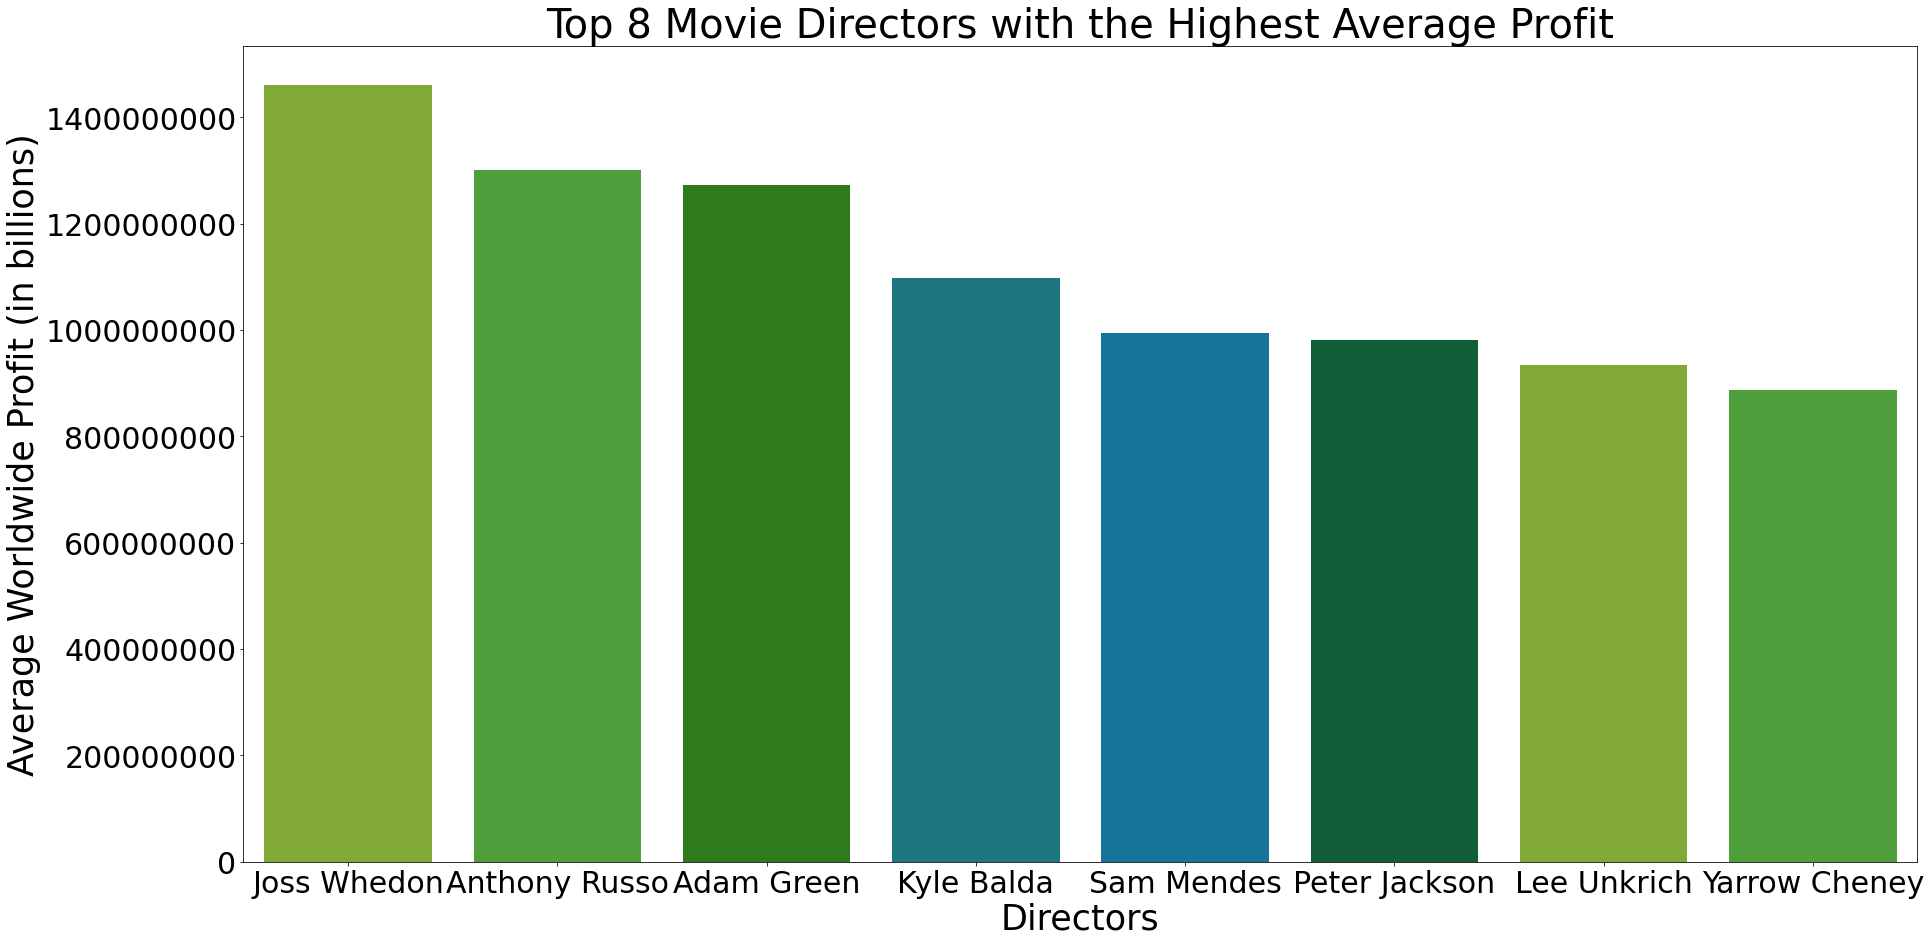

In [17]:
import seaborn as sns
d = directors_profit.head(8)
plt.figure(figsize=(30, 15))
colors = ['#86BC25', '#43B02A', '#26890D', '#0D8390', 
          '#007CB0', '#046A38', '#86BC25','#43B02A', 
          '#26890D', '#0D8390', '#007CB0', '#046A38', 
          '#43B02A', '#26890D']
sns.barplot(x=d.index, y= d['worldwide_gross'], palette = colors)  

# set barplot title and axes labels
plt.title(label = "Top 8 Movie Directors with the Highest Average Profit", fontsize=40)
plt.xlabel("Directors", fontsize=35)
plt.ylabel("Average Worldwide Profit (in billions)", fontsize=35)
plt.ticklabel_format(style='plain', axis='y')

# set x and y tick size
plt.xticks(size = 30)
plt.yticks(size = 30);

In [ ]:
animation = final_direct[final_direct['genres'] == 'Animation']
directors_profit_animation = animation.groupby('primary_name').mean()['worldwide_gross'].sort_values(ascending=False).to_frame()
directors_profit_animation

In [ ]:
adventure = final_direct[final_direct['genres'] == 'Adventure']
directors_profit_adventure = adventure.groupby('primary_name').mean()['worldwide_gross'].sort_values(ascending=False).to_frame()
directors_profit_adventure

In [ ]:
scifi = final_direct[final_direct['genres'] == 'Sci-Fi']
scifi
directors_profit_scifi = scifi.groupby('primary_name').mean()['worldwide_gross'].sort_values(ascending=False).to_frame()
for x in directors_profit_scifi['worldwide_gross']:
    directors_profit_scifi['worldwide_gross'][x] = format(x, 'f')

directors_profit_scifi

# Random other analysis - don't need for final

In [ ]:
final.isnull().sum()

In [119]:
np.unique(final.columns.values)

array(['domestic_gross', 'domestic_profit', 'genres',
       'imdb_average_rating', 'imdb_vote_count', 'movie_id', 'popularity',
       'primary_title', 'production_budget', 'release_date',
       'runtime_minutes', 'tmdb_vote_average', 'tmdb_vote_count',
       'worldwide_gross', 'worldwide_profit'], dtype=object)

In [7]:
# final.groupby(['primary_name', 'worldwide_profit']).agg('mean')

In [17]:
final.primary_name.value_counts()

Steven Spielberg     21
Ridley Scott         18
Steven Soderbergh    17
Clint Eastwood       17
Jon M. Chu           16
                     ..
Erik White            1
Eric Mendelsohn       1
Sudz Sutherland       1
Fred Andrews          1
Marcel Walz           1
Name: primary_name, Length: 1242, dtype: int64

In [9]:
directors_profit = final.groupby('primary_name').mean()['worldwide_gross'].sort_values(ascending=False).to_frame()
directors_profit

,worldwide_gross
primary_name,
Joss Whedon,1.460475e+09
Anthony Russo,1.300869e+09
Adam Green,1.272470e+09
Kyle Balda,1.097532e+09
Sam Mendes,9.950740e+08
...,...
Dominic Burns,0.000000e+00
Brad Copeland,0.000000e+00
Matt Walsh,0.000000e+00


AttributeError: module 'seaborn' has no attribute 'set_xlabel'

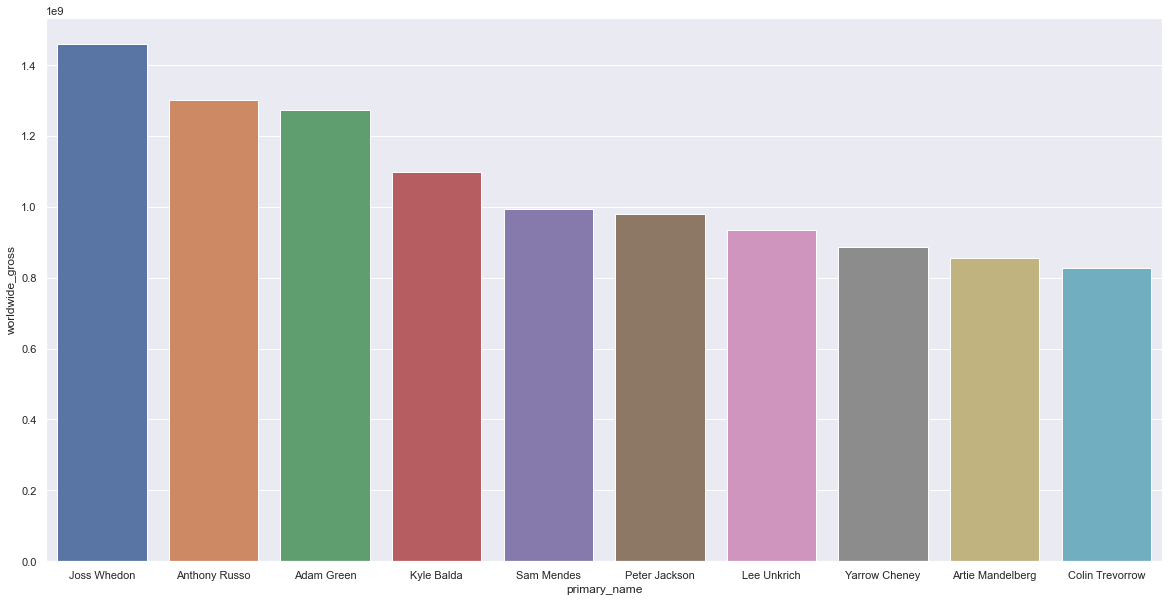

In [22]:
import seaborn as sns
d = directors_profit.head(10)
sns.barplot(x=d.index, y= d['worldwide_gross'])
sns.axlabel()
  
# Set label for y-axis
sns.set_ylabe
  
# Set title for plot
sns.set_title( "Bill vs Tips" , size = 24 )
sns.color_palette("mako", as_cmap=True)
sns.set(rc={'figure.figsize':(20,10)})
# pt.set_xticklabels(rotation=90)


In [10]:
final.describe()

,runtime_minutes,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
count,4293.000000,4293.000000,4.293000e+03,4.293000e+03,4.293000e+03,4.293000e+03,4293.000000,4293.000000,4293.000000,4.293000e+03,4.293000e+03
mean,106.106918,6.259189,1.081837e+05,4.261471e+07,5.240798e+07,1.318604e+08,11.952672,6.199907,1924.762870,9.793264e+06,8.924564e+07
std,17.402236,1.071371,1.608193e+05,5.445943e+07,8.247357e+07,2.271809e+08,8.332019,0.975709,2833.837453,5.705911e+07,1.867543e+08
min,41.000000,1.600000,5.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.600000,0.000000,1.000000,-2.019413e+08,-1.104502e+08
25%,94.000000,5.700000,9.774000e+03,6.800000e+06,1.785645e+06,5.046038e+06,7.139000,5.700000,186.000000,-1.152239e+07,-1.614407e+06
50%,104.000000,6.400000,5.142400e+04,2.100000e+07,2.324754e+07,4.278539e+07,10.307000,6.200000,817.000000,-9.890430e+05,1.779650e+07
75%,116.000000,7.000000,1.321610e+05,5.500000e+07,6.353601e+07,1.428180e+08,15.318000,6.800000,2389.000000,2.000030e+07,9.080884e+07
max,180.000000,9.200000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,80.773000,10.000000,22186.000000,5.000596e+08,1.748134e+09


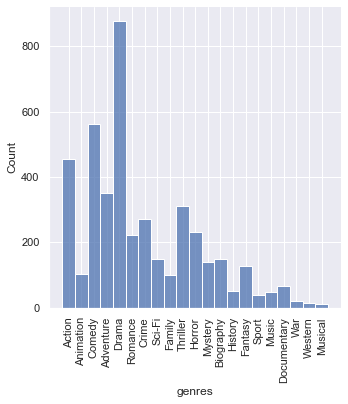

In [58]:
import seaborn as sns
pt = sns.displot(final.genres)
pt.set_xticklabels(rotation=90)

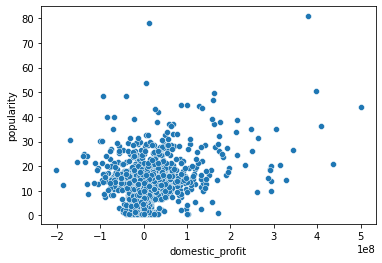

In [20]:
sns.scatterplot(y=final_master_df['popularity'], x=final_master_df['domestic_profit'] );

<AxesSubplot:xlabel='domestic_profit', ylabel='runtime_minutes'>

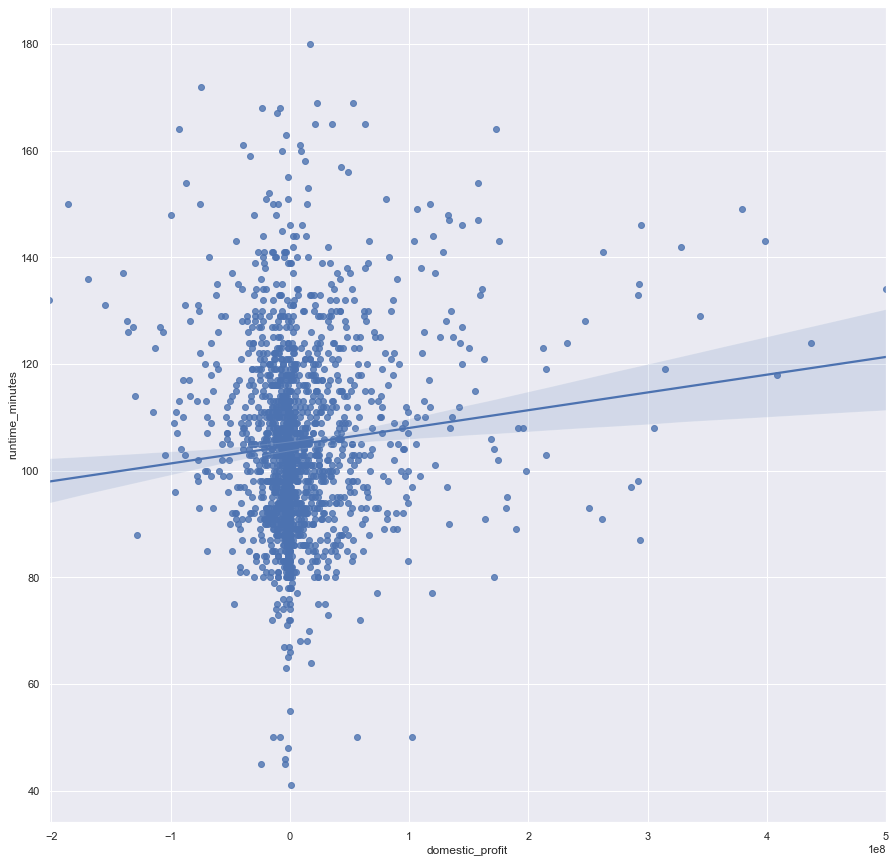

In [33]:
sns.regplot(y=new_master_df['runtime_minutes'], x=new_master_df['domestic_profit'] )

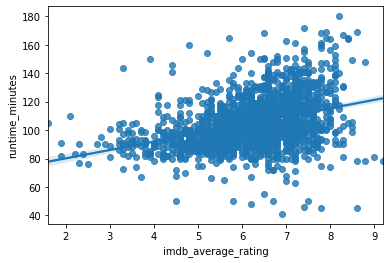

In [21]:
sns.regplot(y=new_master_df['runtime_minutes'], x=new_master_df['imdb_average_rating']);

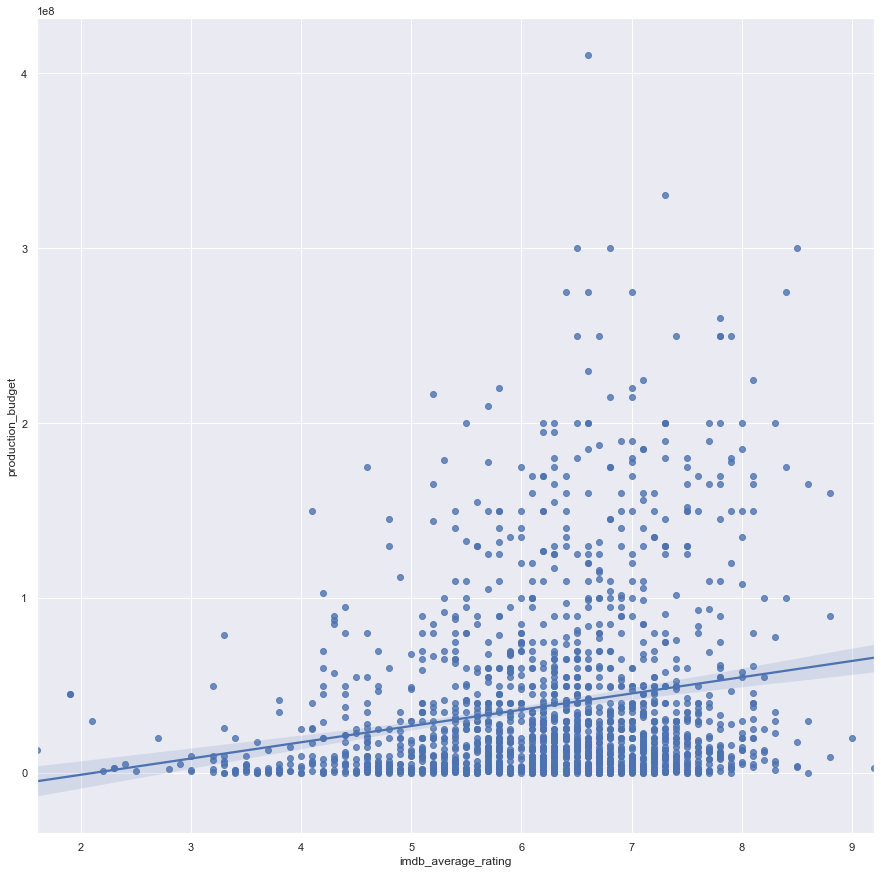

In [32]:
sns.regplot(x=new_master_df['imdb_average_rating'], y=new_master_df['production_budget'] )
sns.set(rc={'figure.figsize':(15,15)})

In [38]:
new_master_df.corr()

,runtime_minutes,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
runtime_minutes,1.000000,0.364189,0.462364,0.380913,0.321494,0.329389,0.401271,0.337634,0.419635,0.100401,0.289403
imdb_average_rating,0.364189,1.000000,0.445326,0.199200,0.270524,0.253997,0.331876,0.725077,0.392224,0.200964,0.251061
imdb_vote_count,0.462364,0.445326,1.000000,0.558319,0.656142,0.648792,0.606784,0.378856,0.906138,0.415001,0.626639
production_budget,0.380913,0.199200,0.558319,1.000000,0.728073,0.799145,0.615160,0.171364,0.651989,0.093908,0.679399
domestic_gross,0.321494,0.270524,0.656142,0.728073,1.000000,0.946672,0.617977,0.270043,0.774016,0.750842,0.939984
worldwide_gross,0.329389,0.253997,0.648792,0.799145,0.946672,1.000000,0.638608,0.250508,0.780004,0.604914,0.984035
popularity,0.401271,0.331876,0.606784,0.615160,0.617977,0.638608,1.000000,0.334689,0.718047,0.304805,0.597379
tmdb_vote_average,0.337634,0.725077,0.378856,0.171364,0.270043,0.250508,0.334689,1.000000,0.377115,0.227086,0.255043
tmdb_vote_count,0.419635,0.392224,0.906138,0.651989,0.774016,0.780004,0.718047,0.377115,1.000000,0.495943,0.759068
domestic_profit,0.100401,0.200964,0.415001,0.093908,0.750842,0.604914,0.304805,0.227086,0.495943,1.000000,0.710575


<AxesSubplot:>

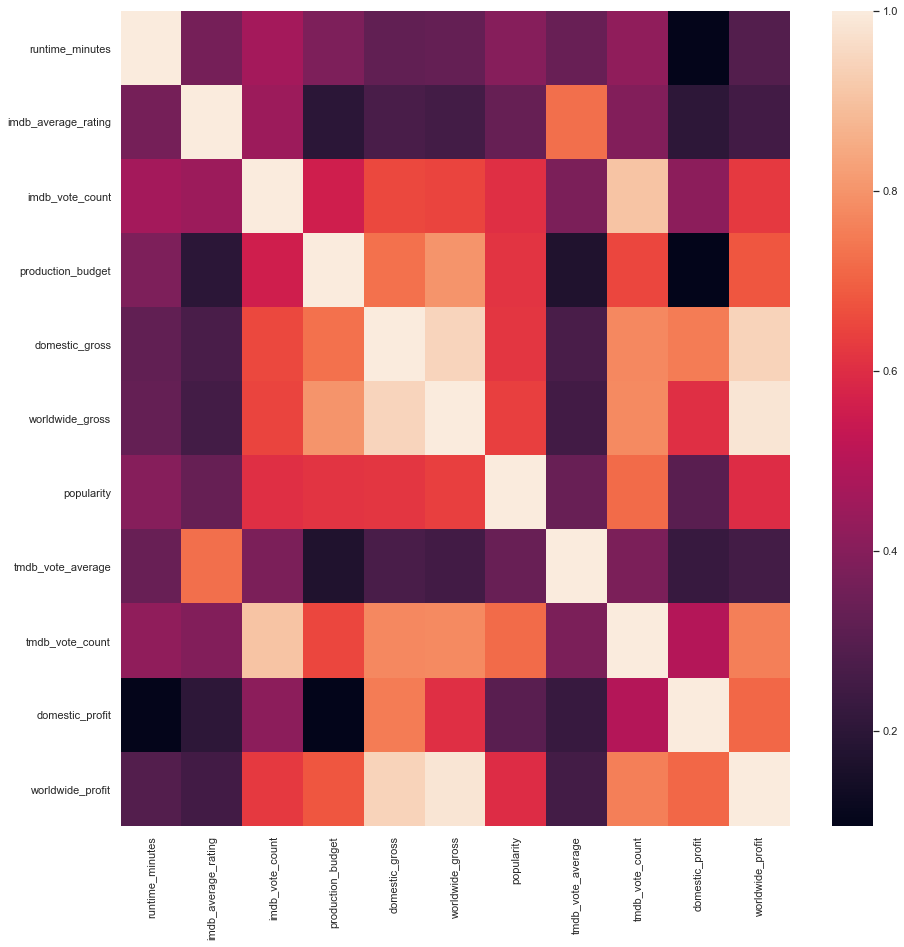

In [40]:
sns.heatmap(new_master_df.corr())

In [83]:
# new_master_df['genres'] = new_master_df['genres'].split(',')

final['genres'] = final['genres'].dropna()
# explode = new_master_df.explode(new_master_df['genres'])
final

,index,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46,-45000000,-44926294
1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200,909808,965996
2,2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518,-24279172,-15686698
3,3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859,-32763162,96861183
4,4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685,-1982315,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782,19363237,71736188
1746,1746,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813,96968774,133668774
1747,1747,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491,34069456,60133905
1748,1748,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11,-1500000,-1401194


In [81]:
final.explode('genres')

ValueError: columns must be unique